# Giới thiệu

#### **OpenCV là gì?**
OpenCV (Open Source Computer Vision Library) là một thư viện mã nguồn mở được thiết kế để xử lý ảnh, thị giác máy tính và học sâu. Thư viện này được phát triển lần đầu tiên bởi Intel vào năm 1999 và hiện được bảo trì bởi tổ chức OpenCV.org.
OpenCV hỗ trợ nhiều ngôn ngữ như Python, C++, Java, nhưng Python là một trong những lựa chọn phổ biến nhất do cú pháp đơn giản và mạnh mẽ.

#### **Tính năng nổi bật của OpenCV**
- Xử lý ảnh (lọc ảnh, thay đổi kích thước, biến đổi màu, phát hiện cạnh, v.v.)
- Nhận diện khuôn mặt, mắt, nụ cười,...
- Phát hiện và theo dõi đối tượng trong video
- Trích xuất đặc trưng ảnh (feature detection, matching)
- Tích hợp với học sâu (Deep Learning frameworks như TensorFlow, PyTorch, ONNX)
- Hỗ trợ xử lý video và webcam theo thời gian thực


# Bắt đầu với Xử lý ảnh


Notebook này sẽ giúp bạn thực hiện những bước đầu tiên trong việc học Xử lý Ảnh và Thị giác Máy tính (Computer Vision) sử dụng OpenCV. Bạn sẽ học được một số bài học quan trọng thông qua các ví dụ đơn giản. Trong notebook này, bạn sẽ học được những nội dung sau:

Đọc một hình ảnh

- Kiểm tra các thuộc tính của hình ảnh như kiểu dữ liệu và kích thước

- Biểu diễn hình ảnh dưới dạng ma trận trong Numpy

- Hình ảnh màu và việc tách/gộp các kênh màu của hình ảnh

- Hiển thị hình ảnh bằng matplotlib

- Lưu hình ảnh

## Thêm các thư viện

In [40]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

## Hiển thị hình ảnh trực tiếp

Mình sẽ sử dụng hình ảnh sau làm hình ảnh mẫu. Mình sẽ sử dụng hàm hình ảnh ipython để tải và hiển thị hình ảnh.

In [41]:
# Display 18x18 pixel image.
Image(filename="image/checkerboard_18x18.png")

In [42]:
# Display 84x84 pixel image.
Image(filename="image/checkerboard_84x84.jpg")

image = cv2.imread("image/checkerboard_18x18.png")
print(image)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [255 255 255]
  

## Đọc hình ảnh bằng OpenCV


OpenCV cho phép đọc các loại hình ảnh khác nhau (JPG, PNG, v.v.). Bạn có thể tải hình ảnh thang độ xám, hình ảnh màu hoặc bạn cũng có thể tải hình ảnh bằng kênh Alpha. Nó sử dụng hàm **`cv2.imread()`** có cú pháp sau:

### Cú pháp hàm

``` python
retval = cv2.imread( filename[, flags] )
```

`retval`: Là hình ảnh nếu nó được tải thành công. Nếu không, nó là `None`. Điều này có thể xảy ra nếu tên tệp không đúng hoặc tệp bị hỏng.

Hàm có **1 đối số đầu vào bắt buộc** và một cờ tùy chọn:

1. `filename`: Đây có thể là đường dẫn **tuyệt đối** hoặc **tương đối**. Đây là đối số **bắt buộc**.

2. `Flags`: Các cờ này được dùng để đọc hình ảnh ở một định dạng cụ thể (ví dụ: thang độ xám/màu/có kênh alpha). Đây là **đối số tùy chọn** có giá trị mặc định là `cv2.IMPREAD_COLOR` hoặc `1` để tải hình ảnh dưới dạng hình ảnh màu.

Trước khi tiến hành một số ví dụ, chúng ta hãy cùng xem một số `flag` có sẵn.

**Flags**
1. **`cv2.IMPREAD_GRAYSCALE`** hoặc **`0`**: Tải hình ảnh ở chế độ thang độ xám
2. **`cv2.IMPREAD_COLOR`** hoặc **`1`**: Tải hình ảnh màu. Bất kỳ độ trong suốt nào của hình ảnh sẽ bị bỏ qua. Đây là cờ mặc định.
3. **`cv2.IMPREAD_UNCHANGED`** hoặc **`-1`**: Tải hình ảnh dưới dạng như vậy bao gồm cả kênh alpha.

### Tài liệu OpenCV

1. **`Imread`**: <a href="https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56" target="_blank">Liên kết tài liệu</a>

2. **`ImreadModes`**: <a href="https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80" target="_blank">Liên kết tài liệu</a>

In [43]:
# Đọc hình ảnh dưới dạng thang độ xám.
cb_img = cv2.imread("image/checkerboard_18x18.png", cv2.IMREAD_GRAYSCALE)

# In dữ liệu hình ảnh (giá trị pixel), phần tử của mảng numpy 2D.
# Mỗi giá trị pixel là 8 bit [0,255]
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

## Hiển thị thuộc tính hình ảnh

In [44]:
# in kích thước của hình ảnh
print("Kích thước hình ảnh (H, W) là:", cb_img.shape)

# in kiểu dữ liệu của hình ảnh
print("Kiểu dữ liệu của hình ảnh là:", cb_img.dtype)

Kích thước hình ảnh (H, W) là: (18, 18)
Kiểu dữ liệu của hình ảnh là: uint8


## Hiển thị hình ảnh bằng Matplotlib

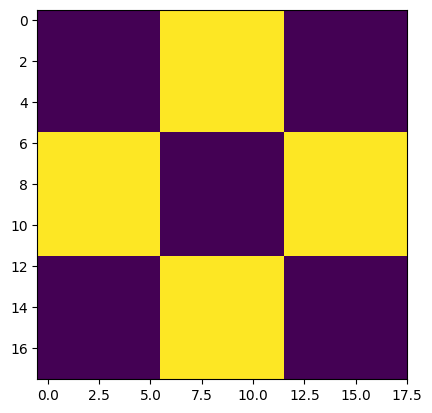

In [45]:
# Display image.
plt.imshow(cb_img)

### Chuyện gì đã xảy ra?


Mặc dù hình ảnh được đọc dưới dạng hình ảnh thang độ xám, nhưng nó không nhất thiết phải hiển thị ở thang độ xám khi sử dụng `imshow()`. matplotlib sử dụng các bản đồ màu khác nhau và có thể bản đồ màu thang độ xám chưa được thiết lập.

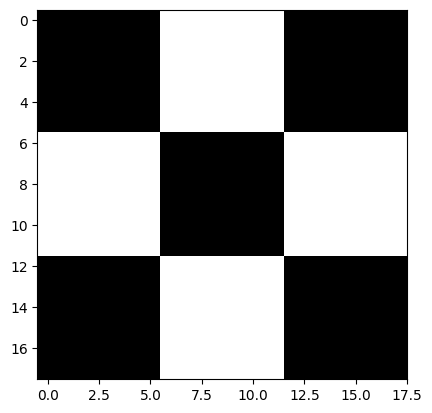

In [46]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")

## Một ví dụ khác

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

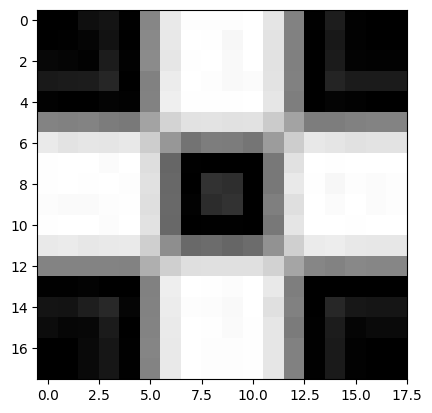

In [47]:
# Đọc hình ảnh dưới dạng thang độ xám.
cb_img_fuzzy = cv2.imread("image/checkerboard_fuzzy_18x18.jpg", 0)

# in hình ảnh
print(cb_img_fuzzy)

# Hiển thị hình ảnh.
# plt.imshow(cb_img_fuzzy)
plt.imshow(cb_img_fuzzy, cmap="gray")

## Làm việc với hình ảnh màu

Cho đến bây giờ, chúng ta đã sử dụng hình ảnh thang độ xám trong cuộc thảo luận của mình. Bây giờ chúng ta hãy thảo luận về hình ảnh màu.

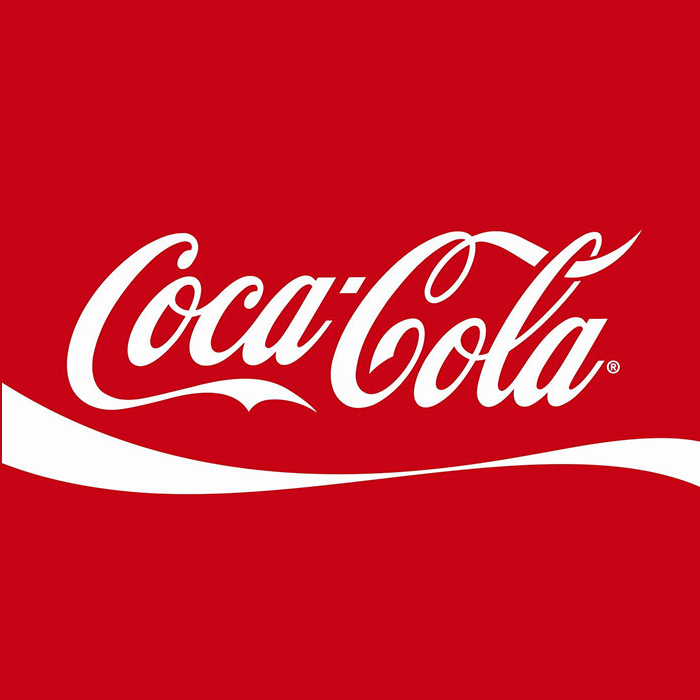

In [48]:
# Đọc và hiển thị logo Coca-Cola.
Image("image/coca-cola-logo.png")

## Đọc và hiển thị hình ảnh màu


Chúng ta hãy đọc một hình ảnh màu và kiểm tra các thông số. Lưu ý kích thước hình ảnh.

In [49]:
# Đọc trong hình ảnh
coke_img = cv2.imread("image/coca-cola-logo.png", 1)

# in kích thước của hình ảnh
print("Kích thước hình ảnh (H, W, C) là:", coke_img.shape)

# in kiểu dữ liệu của hình ảnh
print("Kiểu dữ liệu của hình ảnh là:", coke_img.dtype)

Kích thước hình ảnh (H, W, C) là: (700, 700, 3)
Kiểu dữ liệu của hình ảnh là: uint8


## Hiển thị hình ảnh

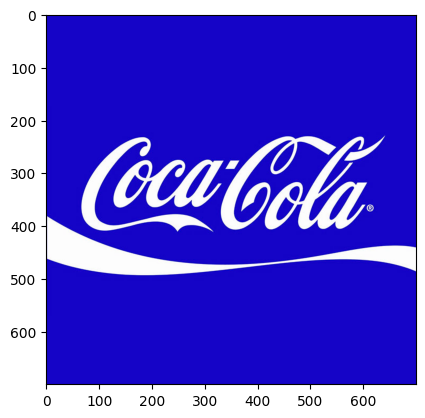

In [50]:
plt.imshow(coke_img)

### Điều gì đã xảy ra
Màu hiển thị ở trên khác với hình ảnh thực tế. Điều này là do matplotlib mong đợi hình ảnh ở định dạng RGB trong khi OpenCV lưu trữ hình ảnh ở định dạng BGR. Do đó, để hiển thị chính xác, chúng ta cần đảo ngược các kênh của hình ảnh. Chúng ta sẽ thảo luận về các kênh trong các phần bên dưới.

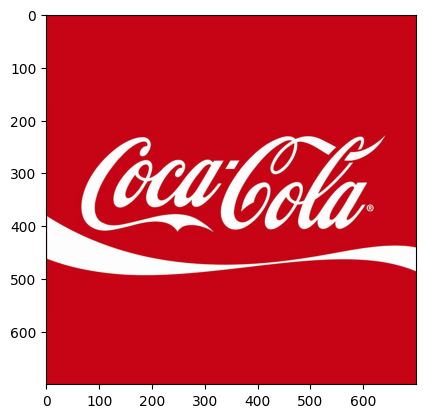

In [51]:
coke_img_channels_reversed = coke_img[:, :, ::-1]
plt.imshow(coke_img_channels_reversed)

## Lưu hình ảnh

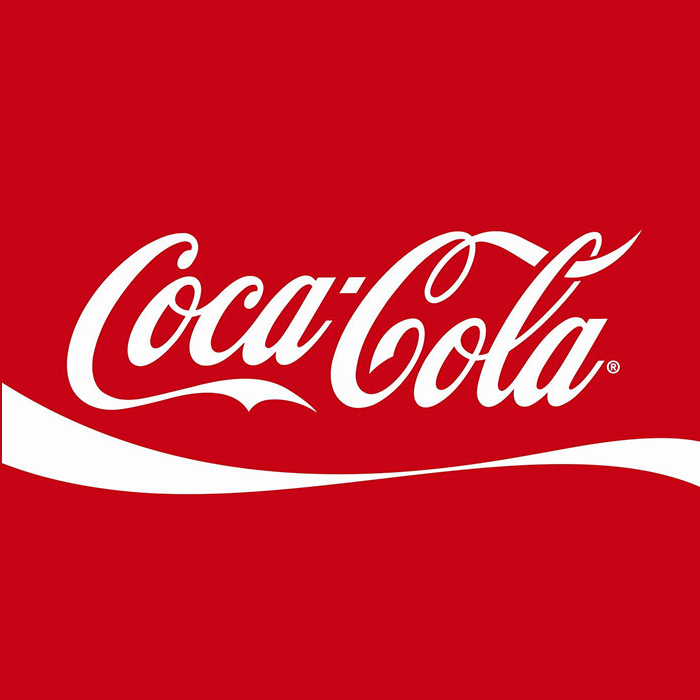

In [52]:
# save the image
cv2.imwrite("image/coca-cola-logo-save.png", coke_img)

Image(filename='image/coca-cola-logo-save.png')

In [53]:
# đọc hình ảnh dưới dạng Màu
img_NZ_bgr = cv2.imread("image/coca-cola-logo-save.png", cv2.IMREAD_COLOR)
print("img_NZ_bgr shape (H, W, C) is:", img_NZ_bgr.shape)

# đọc hình ảnh dưới dạng Xám
img_NZ_gry = cv2.imread("image/coca-cola-logo-save.png", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape (H, W) is:", img_NZ_gry.shape)

img_NZ_bgr shape (H, W, C) is: (700, 700, 3)
img_NZ_gry shape (H, W) is: (700, 700)
